# Tweets per User

In [1]:
import pandas as pd
from functools import reduce
from datetime import date, timedelta,datetime
import matplotlib.pyplot as plt
%matplotlib inline
from ast import literal_eval

In [2]:
df = None
for ym in ["2020-12"] + [f"2021-0{k}" for k in range(1,10)]:
    tmp = pd.read_csv(f"../data/{ym}.csv")
    if df is None:
        df = tmp
    else:
        df = pd.concat((df, tmp))

for col_name in ["entities", "sentiment_value", "vaccines"]:
    df[col_name] = df[col_name].apply(lambda x: literal_eval(x) if not pd.isna(x) else x) 
df.reset_index(drop=True, inplace=True)
df = df[df.created_at < "2021-09-07"]

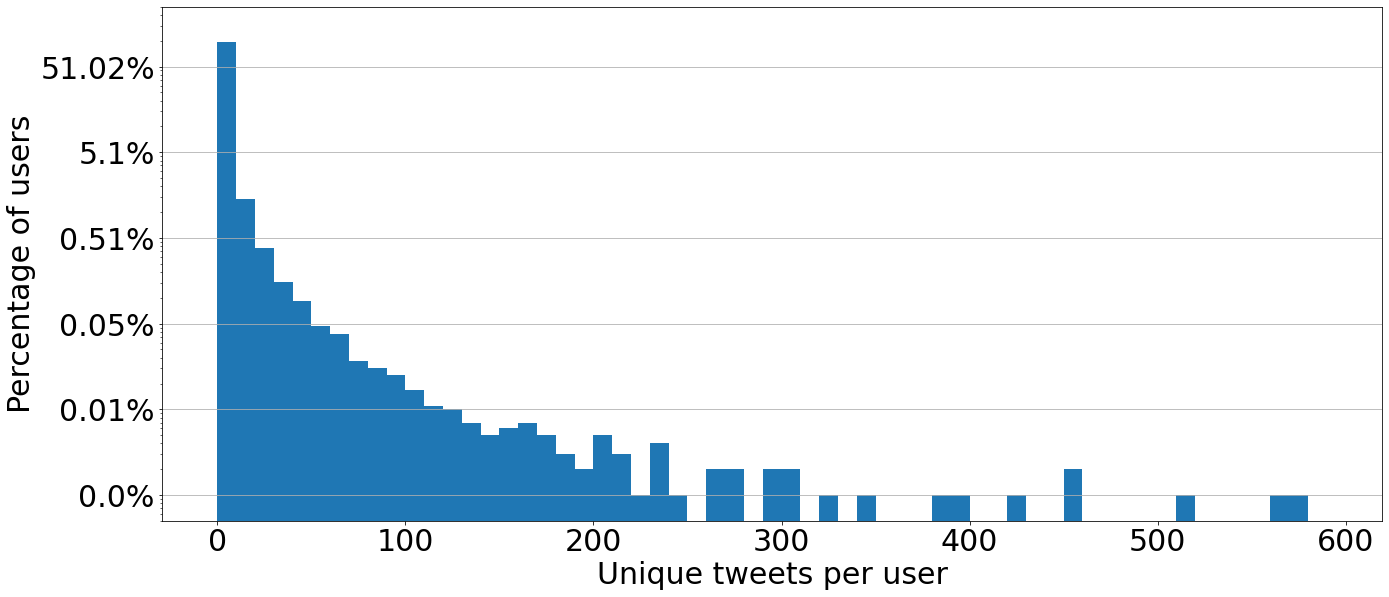

In [3]:
plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.ymargin'] = 0.003

plt.figure(figsize=(20,9))

x = df.groupby("user_id").count().tweet_id.sort_values()
num_users = len(df.groupby("user_id"))

x.plot(
    kind="hist",
    log=True,
    bins=range(0,600,10),
    orientation="vertical",
)



plt.ylabel("Percentage of users")
plt.xlabel("Unique tweets per user")

locs, labels = plt.yticks()
plt.yticks(locs, [str(round(l/num_users*100, 2))+"%" for l in locs])

plt.ylim((0.5, 500000))

plt.grid(axis="y")

plt.tight_layout()

plt.savefig("output/plots_tweets_per_user.pdf")
plt.savefig("output/plots_tweets_per_user.png")

plt.show()

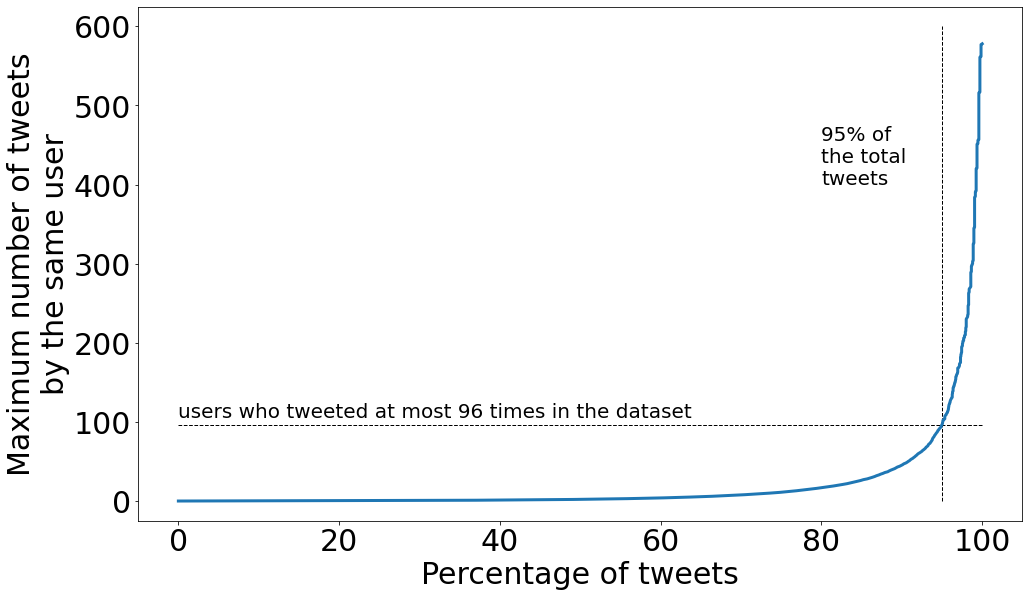

In [4]:
plt.figure(figsize=(15,9))

counts=x

cumulative = []
for k in range(counts.max()+1):
    cumulative.append(counts[counts<=k].sum())
cumulative = [x/max(cumulative)*100 for x in cumulative]

plt.plot(cumulative, list(range(counts.max()+1)), lw=3)
plt.vlines(x=95, ymin=0, ymax=600, ls="--", color="k", lw=1)
plt.text(80,400, "95% of\nthe total\ntweets", size=20)
plt.hlines(y=96, xmin=0, xmax=100, ls="--", color="k", lw=1)
plt.text(0, 96+10, "users who tweeted at most 96 times in the dataset", size=20)

plt.xlabel("Percentage of tweets")
plt.ylabel("Maximum number of tweets\nby the same user")

plt.ylim(-25,625)

plt.tight_layout()

plt.savefig("output/plots_tweets_per_user_cumulative.pdf")
plt.savefig("output/plots_tweets_per_user_cumulative.png")

plt.show()

In [6]:
df["ymonth"] = df.created_at.str[0:7]
tmp = df.groupby("ymonth")
l = []

for ym, d in tmp:
    
    x = d.groupby("user_id").count().tweet_id.sort_values()
    
    l.append(
        (
            len(d.tweet_id.unique()),
            len(d.user_id.unique()),
            x.max(),
            x.min(),
            x.mean(),
            x.std(),
            x.mode()[0],
            x.iloc[len(x)//2],
        )
    )
x = df.groupby("user_id").count().tweet_id.sort_values()
l.append(
    (
        len(df.tweet_id.unique()),
        len(df.user_id.unique()),
        x.max(),
        x.min(),
        x.mean(),
        x.std(),
        x.mode()[0],
        x.iloc[len(x)//2],
    )
)
l = pd.DataFrame(l, index=list(tmp.groups)+["all"], columns=["num_tweets", "num_users", "max_tweets", "min_tweets", "avg_tweets", "std_tweets", "mode", "median"])
l.round(2)

,num_tweets,num_users,max_tweets,min_tweets,avg_tweets,std_tweets,mode,median
2020-12,21235,15983,40,1,1.33,1.29,1,1
2021-01,42891,30294,71,1,1.42,1.76,1,1
2021-02,36892,25100,98,1,1.47,1.98,1,1
2021-03,51463,35400,181,1,1.45,2.47,1,1
2021-04,62693,41158,117,1,1.52,2.45,1,1
2021-05,48780,32259,134,1,1.51,2.45,1,1
2021-06,41360,27395,154,1,1.51,2.45,1,1
2021-07,42736,29367,139,1,1.46,2.26,1,1
2021-08,41589,29937,232,1,1.39,2.09,1,1
2021-09,7063,5832,27,1,1.21,0.84,1,1
